In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# plot inside the notebook rather than in a new window
%matplotlib inline

In [2]:
dataset = pd.read_csv('./data/pima-diabetes.csv')

In [3]:
print(f'table shape: {dataset.shape}')
dataset.head(10)

table shape: (768, 10)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [4]:
# Data cleaning

null values present: False


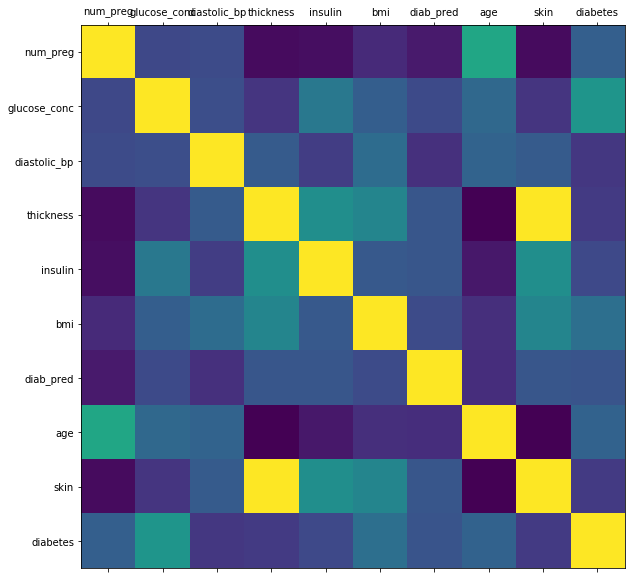

In [5]:
def plot_correlation(dataset):
    """
    Plots a correlation graph for a dataset to help removing
    duplicated columns
    """
    _, axis = plt.subplots(
        figsize=(10,10)
    )
    
    corr_tab = dataset.corr()
    
    axis.matshow(corr_tab)
    plt.xticks(range(len(corr_tab.columns)), corr_tab.columns)
    plt.yticks(range(len(corr_tab.index)), corr_tab.index)
    
    
plot_correlation(dataset)
print(f'null values present: {dataset.isnull().values.any()}')


In [6]:
# remove duplicated column
del dataset['skin']

In [7]:
# Data sanitization

In [8]:
# force bool to int
dataset['diabetes'] = dataset['diabetes'].map(lambda x: int(x))

In [9]:
dataset.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# evaluate class for meaningful number of datapoints
diabetic_samples = dataset.loc[dataset['diabetes'] == True]
print(f'diabetes incidence: abs {len(diabetic_samples)}, rel {len(diabetic_samples)/len(dataset.index):.4f}')

diabetes incidence: abs 268, rel 0.3490


In [20]:
# Data preparation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [22]:
dataset_classes = ['diabetes']
dataset_features = [col for col in dataset.columns if col not in dataset_classes]

X = dataset[dataset_features].values
y = dataset[dataset_classes].values

In [42]:
# impute missing data
for feature in dataset_features:
    print(f'{feature}: {len(dataset[feature][lambda x: x == 0])}')
    
imputer_instance = Imputer(
    missing_values=0,
    strategy='mean',
    axis=0
)
# TODO: this will overwrite the number of pregnancies too!
X_imputed = imputer_instance.fit_transform(X)

num_preg: 111
glucose_conc: 5
diastolic_bp: 35
thickness: 227
insulin: 374
bmi: 11
diab_pred: 0
age: 0


In [43]:
# split test/training, default to .25/.75
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=123)

In [44]:
# Fitting with naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [50]:
fitter_instance = GaussianNB()

In [59]:
fitter_instance.fit(X, y.ravel())

GaussianNB(priors=None)

In [63]:
# prediction on training data
train_prediction = fitter_instance.predict(X_train)
metrics.accuracy_score(y_train, train_prediction)

0.75

In [64]:
# prediction on test data
test_prediction = fitter_instance.predict(X_test)
metrics.accuracy_score(y_test, test_prediction)

0.76041666666666663

             precision    recall  f1-score   support

          0       0.81      0.81      0.81       119
          1       0.68      0.68      0.68        73

avg / total       0.76      0.76      0.76       192



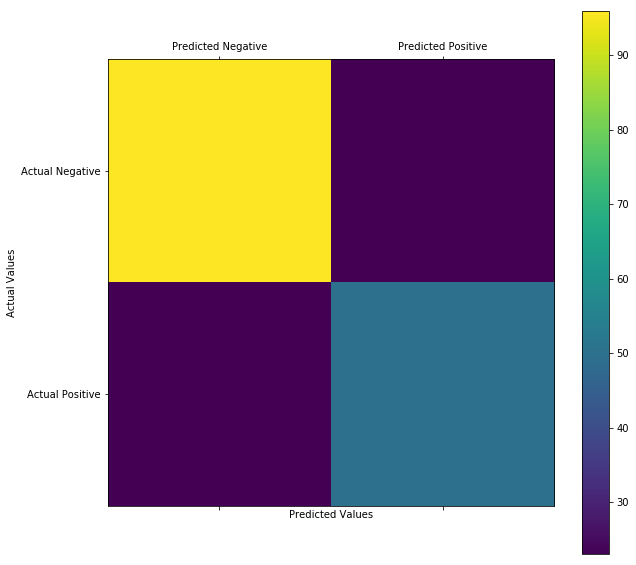

In [83]:
# general stats
def plot_confusion_matrix(y, prediction):
    """
    Plots a 2x2 matrix showing the TN/FN/TP/FP ratios
    """
    _, axis = plt.subplots(
        figsize=(10,10)
    )
    
    conf_tab = metrics.confusion_matrix(y, prediction)
    plot = axis.matshow(conf_tab)
    
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.colorbar(plot)
    plt.xticks([0,1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0,1], ['Actual Negative', 'Actual Positive'])
    
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction)